# <font color='blue'>Interpolação de Funções</font>

### Material produzido por Luis Gustavo Nonato

ICMC-USP

----

### Conteúdo
- Interpolação Polinomial
- Interpolação Hermite
- Interpolação por Splines Cúbicas

**Bibliografia**
- Uri Acher e Chen Greif, A First Course in Numerical Methods, SIAM, 2011 (Capítulos 10 e 11)

- A. Quarteroni, R. Sacco, F. Saleri, Numerical Mathematics, Springer, 1991 (Capítulo 8)

## <font color='blue'> Interplação Polinomial </font>

Vimos que o método de mínimos quadrados podem ser utilizados para aproximar pontos amostrados de uma função. Mas e se quisermos interpolar os pontos ao invés de aproximá-los?

Text(0.5, 1.0, 'Interpolação')

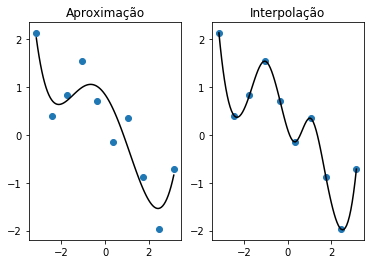

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

n = 10
x = np.linspace(-np.pi,np.pi,n)
y = np.sin(2*x**2) - 0.5*x + np.random.uniform(-0.3,0.3,n)

A = np.ones((n,6))
for i in range(1,6):
    A[:,i] = x**i
    
alpha = np.linalg.lstsq(A,y,rcond=None)[0]
cs = CubicSpline(x, y)

t = np.linspace(-np.pi,np.pi,100)
lsqr = np.polyval(alpha[::-1],t)
cubic = cs(t)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(x,y,marker='o')
ax1.plot(t,lsqr,color='k')
ax1.set_title('Aproximação')

ax2.scatter(x,y,marker='o')
ax2.plot(t,cubic,color='k')
ax2.set_title('Interpolação')

Se $(x_i,y_i),\, i=1,\ldots,n$ são os pontos que queremos interpolar, o que precisamos fazer é encontrar uma função $q(x)$ que satisfaça 

$$
q(x_i)=y_i,\,\forall i
$$ 

Tal função é chamada de **função interpoladora**.

**Polinômios de Lagrange**

Seja $(x_i,y_i),\, i=1,\ldots,n$ os pontos que queremos interpolar. Uma observação interessante é que o polinômio

$$
\mathcal{l}_i(x) = \,\frac{(x-x_1)(x-x_2)\cdots (x-x_{i-1})(x-x_{i+1})\cdots(x-x_n)}{(x_i-x_1)(x_i-x_2)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots(x_i-x_n)}
$$

Note que o polinômio $\mathcal{l}_i(x)$ é um polinômio de grau $n-1$.

satisfaz a condição:

$$
\mathcal{l}_i(x_j) = \left\{
\begin{matrix}
1 & \mbox{se } j=i\\
0 & \mbox{caso contrário}
\end{matrix}
\right.
$$

Desta forma, a função $q_i(x)=y_i\, l_i(x)$ interpola o ponto $(x_i,y_i)$.

**OBS:** Temos um polinômio de Lagrange para cada amosta $(x_i,y_i)$.

(100,)


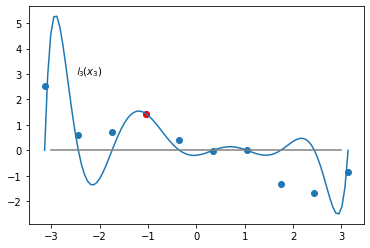

In [6]:
n = 10
x = np.linspace(-np.pi,np.pi,n)
y = np.sin(2*x**2) - 0.5*x + np.random.uniform(-0.3,0.3,n)

def li(t,x,i):
    numerador = np.asarray([t-x[j] for j in range(x.size) if j!=i])
    denominador = x[i]-x
    denominador[i] = 1
    return(np.prod(numerador,axis=0)/np.prod(denominador))

t = np.linspace(-np.pi,np.pi,100)
p=y[3]*li(t,x,3)
print(p.shape)
plt.scatter(x,y,marker='o')
plt.scatter(x[3],y[3],marker='o',color='r')
plt.plot(t,p)
plt.text(-2.5,3,'$\mathcal{l}_3(x_3)$')
plt.plot([-3,3],[0,0],color='gray')

Desta forma se combinarmos as funções $l_i(x)$ para todo $i$ como:

$$
q(x) = \sum_{i=1}^{n} y_i l_i(x)
$$

teremos uma função que intermpola todos os pontos. Os polinômios $l_i(x)$ são chamados de **polinômios de Lagrange** e a função $q(x)$ **função interpoladora de Lagrange**.

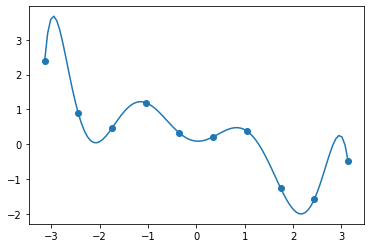

In [8]:
# O pacote scipy possui um método que calcula a função interpoladora de Lagrange.
from scipy.interpolate import lagrange

n = 10
x = np.linspace(-np.pi,np.pi,n)
y = np.sin(2*x**2) - 0.5*x + np.random.uniform(-0.3,0.3,n)

t = np.linspace(-np.pi,np.pi,100)
plagrange = lagrange(x,y)
q = plagrange(t)

plt.scatter(x,y,marker='o')
plt.plot(t,q)

Cada $l_i(x)$ é um polinômio de grau $n-1$, logo a função interpoladora de Lagrange é um polinômio de grau $n-1$.

Duas perguntas que podemos nos fazer são as seguintes

1. Existe um polinômio de grau $k<n-1$ que interpole o pontos? 
2. Existe algum outro polinômio, diferente do polinômio interpolador de lagrange, que também interpole os pontos?

A resposta para as duas perguntas acima é **NÃO**. Temos então o seguinte teorema:

**Teorema**: _Dado um conjunto de pontos $(x_i,y_i)$, $x_i\neq x_j,\, \forall i$, existe único o polinômio interpolador de grau mínimo $n-1$ que interpola os pontos._

### Erro de Aproximação

Supondo que os valores $y_i$ são obtidos a partir de uma função $f(x)$, o erro de aproximação fornecido pelo polinômio interpolador $P(x)$ de grau $n$ é:

$$
E(x) = f(x)-P(x)=\frac{f^{\{n\}}(\xi)}{n!}\prod_{i=1}^{n}(x-x_i)
$$

onde $f^{\{n\}}$ é a n-ésima derivada de $f$ e $\xi\in(x_1,x_n)$.

## <font color='blue'> Interplação de Hermite </font>

A metodologia anterior assume como dado de entrada amostras da forma $(x_i,y_i)$, ou seja, o ponto onde a amostra foi obtida e o valor da amostra. Porém, existem cenários onde informações adicionais estão disponíveis, como por exemplo a taxa de variação do valor amostrado em cada ponto $x_i$. Em termos matemáticos, a taxa de variação corresponde a derivada da função que está implicitamente associada com os valores amostrados. 

Desta forma, os dados fornecidos correspondem a $(x_i,y_i,y^\prime_i)$ e o objetivo é encontrar uma função que interpolante $q(x)$ que satisfaça:

$$
q(x_i)=y_i\\
q^\prime(x_i)=y^\prime_i
$$

A função que satisfaz as condições acima é chamada de **interpolador de Hermite**.

O caso típico do problema acima é quando temos valores e derivadas fornecidas em dois pontos, ou seja, os dados são:

$$
(x_1,y_1,y^\prime_1),\,(x_2,y_2,y^\prime_2)
$$

(0, 4)

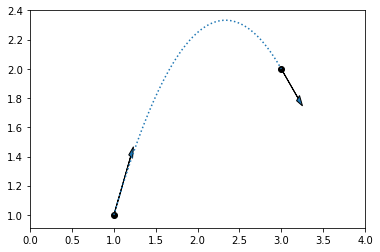

In [11]:
from scipy.interpolate import CubicHermiteSpline

x = np.array([1,3])
y = np.array([1,2])
dydx = np.array([2,-1])

phermite = CubicHermiteSpline(x,y,dydx)

t = np.linspace(1,3,50)
p = phermite(t)

plt.plot(t,p,linestyle=':')
delta = 0.2

plt.arrow(x[0],y[0],delta,dydx[0]*delta,head_width=0.05)
plt.arrow(x[1],y[1],delta,dydx[1]*delta,head_width=0.05)
plt.scatter([x[0],x[1]],[y[0],y[1]],color='k')
plt.xlim(0,4)

Neste caso, devemos encontrar uma função $q(x)$ tal que:

$$
q(x_1)=y_1\\
q(x_2)=y_2\\
q^\prime(x_1)=y^\prime_1\\
q^\prime(x_2)=y^\prime_2\\
$$

ou seja, temos quatro equações que devem ser resolvidas simultaneamente para encontrar $q(x)$. Desta forma, quatro variáveis podem estar envolvidas no cálculo de $q(x)$. Uma escolha natural é supor que $q(x)$ é um polinômio cúbico $q(x)=a_0+a_1x+a_2x^2+a_3x^3$.
Substituindo no sistema de equação obtemos ($q^\prime(x)=a_1+2a_2x+3a_3x^2$):

$$
\begin{matrix}
a_0+a_1x_1+a_2x_1^2+a_3x_1^3 = y_1\\
a_0+a_1x_2+a_2x_2^2+a_3x_2^3 = y_2\\
a_1+2a_2x_1+3a_3x_1^2 = y^\prime_1\\
a_1+2a_2x_2+3a_3x_2^2 = y^\prime_2
\end{matrix}
\rightarrow
\begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
0 & 1 & 2x_1 & 3x_1^2 \\
0 & 1 & 2x_2 & 3x_2^2 
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ a_2 \\ a_3
\end{bmatrix}=
\begin{bmatrix}
y_1 \\ y_2 \\ y^\prime_1 \\ y^\prime_2
\end{bmatrix}
$$

Resolvendo o sistema acima obtemos o polinômio desejado.

**Exemplo**:

(0, 4)

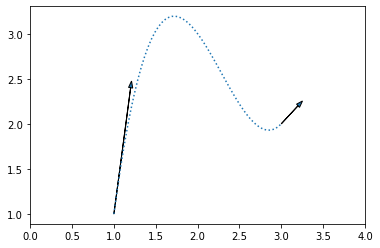

In [14]:
x = np.array([1,3])
y = np.array([1,2])
dy1 = 7
dy2 = 1

A = np.ones((4,4))
A[2:,0] = 0
A[:2,1] = x
A[:2,2] = x**2
A[2:,2] = 2*x
A[:2,3] = x**3
A[2:,3] = 3*x**2

y = np.array([y[0],y[1],dy1,dy2])

a = np.linalg.solve(A,y)

t = np.linspace(1,3,50)
p = np.polyval(a[::-1],t)

plt.plot(t,p,linestyle=':')
delta = 0.2

plt.arrow(x[0],y[0],delta,dy1*delta,head_width=0.05)
plt.arrow(x[1],y[1],delta,dy2*delta,head_width=0.05)
plt.xlim(0,4)

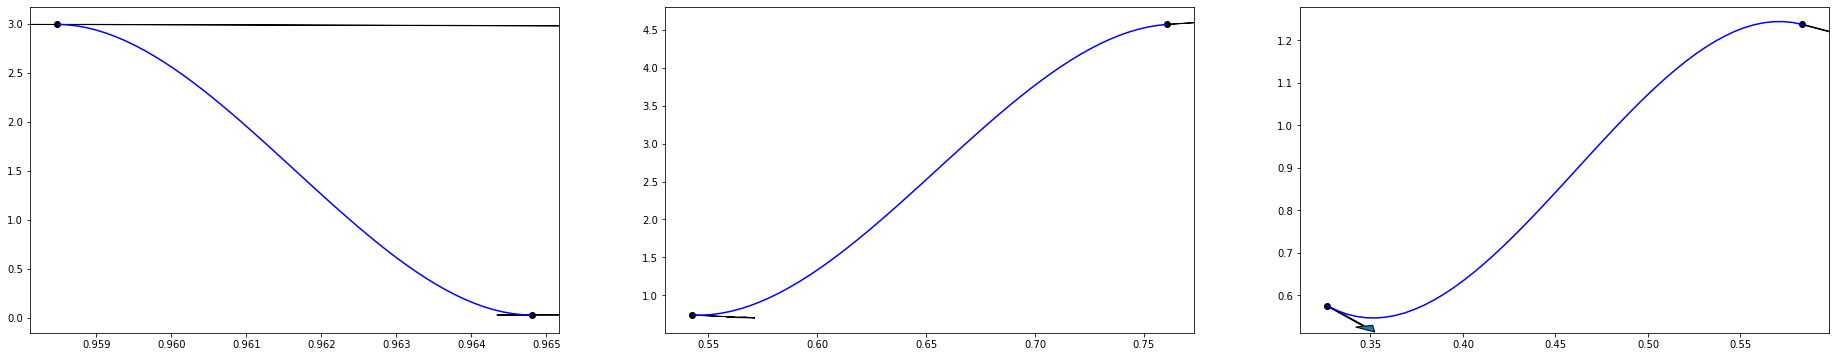

In [37]:
def build_A(x):
    A = np.ones((4,4))
    A[2:,0] = 0
    A[:2,1] = x
    A[:2,2] = x**2
    A[2:,2] = 2*x
    A[:2,3] = x**3
    A[2:,3] = 3*x**2
    return(A)
n = 3
delta = 0.02
x = np.random.uniform(0,1,size=(2,n))
y = np.random.uniform(0,5,size=(2,n))
dydx = np.random.uniform(-3,3,size=(2,n))
 
fig = plt.figure(figsize=(55,6))
for i in range(n):
    A = build_A(x[:,i])
    Y = np.array([y[0,i],y[1,i],dydx[0,i],dydx[1,i]])
    a = np.linalg.solve(A,Y)
    t = np.linspace(x[0,i],x[1,i],50)
    p = np.polyval(a[::-1],t)
    plt.subplot(1,5,i+1)
    plt.plot(t,p,color='blue')
    plt.arrow(x[0,i],y[0,i],delta,dydx[0,i]*delta,head_width=0.01)
    plt.arrow(x[1,i],y[1,i],delta,dydx[1,i]*delta,head_width=0.01)
    plt.scatter([x[0,i],x[1,i]],[y[0,i],y[1,i]],color='k')

## <font color='blue'> Interplação por Splines Cúbicas </font>

Um dos problemas de interpolação utilizando polinômios de Lagrage é que o grau do polinômio acompanha o número de amostras, ou seja, o grau do polinômio aumenta com o número de amostras. Aumentando o grau do polinômio aumenta-se também o número de raizes, fazendo com que o polinômio tenda a oscilar entre os pontos amostrais, gerando aproximações de má qualidade.

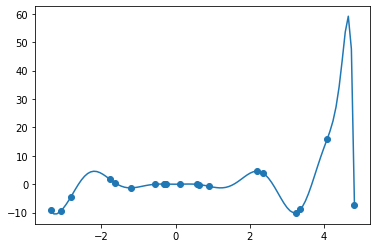

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = np.random.normal(0,3,20)
x = np.asarray(list(sorted(x)))
#y = x**4-20*x**3-10*x**2+x
y = np.cos(3*x)*x**2

t = np.linspace(np.min(x),np.max(x),100)
plagrange = lagrange(x,y)
q = plagrange(t)

# plt.xlim(-2,2)
# plt.ylim(-10,10)
plt.scatter(x,y)
#plt.plot(x,y)
plt.plot(t,q)

Uma forma de interpolar um grande conjuto de pontos evitando o fenômeno da oscilação é realizar interpolações locais forçando com que tais aproximações se combinem de forma suave.

Forçar que as interpolações se combinem de forma suave é importante para gerar uma interpolação que seja diferenciável (derivada existe) nos pontos onde os interpoladores locais se juntam.

No exemplo abaixo vamos realizar interpolações locais utilizando um polinômio quadrático de Lagrange em cada conjunto de três pontos consecutivos.

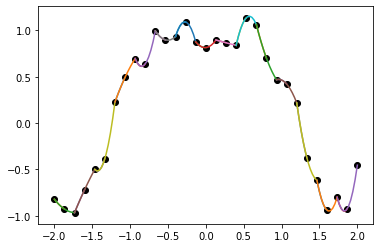

In [13]:
# interpolações locais sem restrição de suavidade

n = 31
x = np.linspace(-2,2,n)
y = np.cos(x**2)+np.random.uniform(-0.2,0.2,n)

plt.scatter(x,y,marker='o',color='k')

for i in range(0,n,2):
    plagrange = lagrange(x[i:i+3],y[i:i+3])
    t = np.linspace(x[i],x[i:i+3],10)
    q = plagrange(t)
    plt.plot(t,q)

Um dos recursos mais utilizados para realizar interpolaçoes locais grantindo suavidade são as chamadas **splines cúbicas**.

A idéia é definir um polinômio cúbico entre cada par de pontos, forçando suavidade nas "emendas" dos polinômios. 

Seja

$$
s_i(x)=a_{i0}+a_{i1}x+a_{i2}x^2+a_{i3}x^3
$$

um polinômio cúbico definido entre os pontos $x_i,x_{i+1}$, $i=1,\ldots,n-1$. A fim de grantir as condições de interpolação e suavidade, definimos o seguinte conjunto de equações:

$$
s_i(x_i)=y_i,\, i=1,\ldots,n-1\\
s_i(x_{i+1})=y_{i+1},\, i=1,\ldots,n-1\\
s^\prime_i(x_{i+1})=s^\prime_{i+1}(x_{i+1}),\, i=1,\ldots,n-2\\
s^{\prime\prime}_i(x_{i+1})=s^{\prime\prime}_{i+1}(x_{i+1}),\, i=1,\ldots,n-2
$$

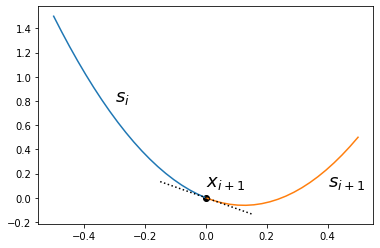

In [44]:
from scipy.interpolate import CubicSpline

x = np.array([-0.5,0,0.5])
y = np.array([1.5,0,0.5])

cs = CubicSpline(x,y)
t1 = np.linspace(x[0],x[1],20)
t2 = np.linspace(x[1],x[2],20)

font = {'fontname':'Arial', 'size':'18', 'color':'black'}

pcs1 = cs(t1)
plt.plot(t1,pcs1)
plt.text(-0.3,0.8,'$s_i$',**font)
pcs2 = cs(t2)
plt.plot(t2,pcs2)
plt.text(0.4,0.1,'$s_{i+1}$',**font)
plt.scatter(0,0,marker='o',color='k')
plt.text(0.0,0.1,'$x_{i+1}$',**font)
k = -0.89
plt.plot([-0.15,0.15],[-0.15*k,0.15*k],color='k',linestyle=':')

Como cada spline cúbica possui 4 coeficientes e temos $n-1$ splines cúbicas, precisamos de $4(n-1)$ equações para que possamos calcular todos os coeficientes. 

Temos quatro conjuntos de equações:

$$
\begin{matrix}
1) & s_i(x_i)=y_i,\, i=1,\ldots,n-1\\
2) & s_i(x_{i+1})=y_{i+1},\, i=1,\ldots,n-1\\
3) & s^\prime_i(x_{i+1})=s^\prime_{i+1}(x_{i+1}),\, i=1,\ldots,n-2\\
4) & s^{\prime\prime}_i(x_{i+1})=s^{\prime\prime}_{i+1}(x_{i+1}),\, i=1,\ldots,n-2
\end{matrix}
$$

Os conjuntos 1) e 2) possuem $n-1$ equações cada, totalizando $2(n-1)$ equações.
Os conjuntos 3) e 4) possuem $n-2$ equações cada, totalizando $2(n-2)$ equações. Logo o sistema acima possui $2(n-1)+2(n-2)=4(n-1)-2$ equações, ou seja, precisamos ainda de mais duas equações para que possamos resolver o sistema. Uma escolha popular é impor derivada igual a zero no primeiro e último ponto do conjunto, ou seja, $s^\prime_1(x_1)=s^\prime_{n-1}(x_n)=0$ (condição Clamped de Spline Cúbica). Com esta condição podemos resolver uma sistema linear de equações e encontrar os coeficientes dos polinômios cúbicos.

**Exemplo**



Text(0.4, 0.5, '$x_{3}$')

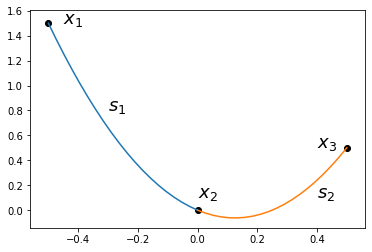

In [60]:
from scipy.interpolate import CubicSpline

x = np.array([-0.5,0,0.5])
y = np.array([1.5,0,0.5])

cs = CubicSpline(x,y)
t1 = np.linspace(x[0],x[1],20)
t2 = np.linspace(x[1],x[2],20)

font = {'fontname':'Arial', 'size':'18', 'color':'black'}

pcs1 = cs(t1)
plt.plot(t1,pcs1)
plt.text(-0.3,0.8,'$s_1$',**font)
plt.text(0.4,0.1,'$s_{2}$',**font)
pcs2 = cs(t2)
plt.plot(t2,pcs2)
plt.scatter(0,0,marker='o',color='k')
plt.text(0.0,0.1,'$x_{2}$',**font)
plt.scatter(x[0],y[0],marker='o',color='k')
plt.text(x[0]+0.05,y[0],'$x_{1}$',**font)
plt.scatter(x[2],y[2],marker='o',color='k')
plt.text(x[2]-0.1,y[2],'$x_{3}$',**font)

Vamos ver um exemplo envolvendo 3 pontos $(x_1,y_1),(x_2,y_2),(x_3,y_3)$. Neste caso,  teremos duas splines cúbicas: 

$$
s_1(x)=a_{10}+a_{11}x+a_{12}x^2+a_{13}x^3,\quad x\in[x_1,x_2]\\
s_2(x)=a_{20}+a_{21}x+a_{22}x^2+a_{23}x^3,\quad x\in[x_2,x_3]
$$

O sistema de equações a ser resolvido se torna:

$$
\begin{array}{ll}
1) & a_{10}+a_{11}x_1+a_{12}x_1^2+a_{13}x_1^3 = y_1\\
   & a_{20}+a_{21}x_2+a_{22}x_2^2+a_{23}x_2^3 = y_2\\ \\
2) & a_{10}+a_{11}x_2+a_{12}x_2^2+a_{13}x_2^3 = y_2\\
& a_{20}+a_{21}x_3+a_{22}x_3^2+a_{23}x_3^3 = y_3\\ \\
3) & a_{11}+2a_{12}x_2+3a_{13}x_2^2 = a_{21}+2a_{22}x_2+3a_{23}x_2^2\\
& \qquad\qquad\qquad\downarrow\\
& (a_{11}-a_{21})+2(a_{12}-a_{22})x_2 + 3(a_{13}-a_{23})x_2^2=0\\ \\
4) & 2a_{12}+6a_{13}x_2 = 2a_{22}+6a_{23}x_2\\
& \qquad\qquad\qquad\downarrow\\
& 2(a_{12}-a_{22})+6(a_{13}-a_{23})x_2=0\\ \\
5) & a_{11}+2a_{12}x_1+3a_{13}x_1^2 = 0\\
 & a_{21}+2a_{22}x_3+3a_{23}x_3^2 =0
\end{array}
$$

Na forma matricial temos:

$$
\begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & 0 & 0   & 0     & 0\\
0 & 0   & 0     & 0     & 1 & x_2 & x_2^2 & x_2^3\\
1 & x_2 & x_2^2 & x_2^3 & 0 & 0   & 0     & 0\\
0 & 0   & 0     & 0     & 1 & x_3 & x_3^2 & x_3^3\\
0 & 1   & 2     & 3     & 0 & -1  & -2    & -3\\
0 & 0   & 2     & 6     & 0 & 0   & -2    & -6\\
0 & 1   & 2x_1  & 3x_1^2& 0 & 0   & 0     & 0\\
0 & 0   & 0     & 0     & 0 & 1   & 2x_3  & 3x_3^2\\
\end{bmatrix}
\begin{bmatrix}
a_{10} \\ a_{11} \\ a_{12} \\ a_{13} \\ a_{20} \\ a_{21} \\ a_{22} \\ a_{23}
\end{bmatrix}=
\begin{bmatrix}
y_1 \\ y_2 \\ y_2 \\ y_3 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

Resolvendo o sistema linear encontramos os coeficientes de cada uma das splines cúbicas.

Um fato interessante sobre splines cúbicas é que a matrix envolvida no sistema linear que deve ser resolvido possui uma estrutura que pode ser manipulada algebricamente de modo a transformá-la em uma matriz tridiagonal, fazendo com que o sistema linear (que pode se tornar bastante grande) possa ser resolvido de forma muito eficiente, mesmo quando muitos pontos estão envolvidos no problema.
Para detalhes de como tal manipulação algébrica pode ser realizada, veja [esta referência](https://en.wikiversity.org/wiki/Cubic_Spline_Interpolation).

O pacote <font color='blue'> interpolate </font> do <font color='blue'> scipy </font> possui um método chamado <font color='blue'> CubicSpline </font> que calcula a interpolação spline utilizando a matriz tridiagonal obtida pela manipulação algébrica.

[162.3684753  -34.84228733   0.34122344   1.10743541]


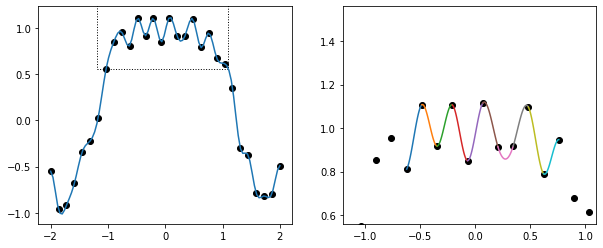

In [82]:
# interpolações por splines cúbicas
import matplotlib.patches as patches
from scipy.interpolate import CubicSpline

n = 30
x = np.linspace(-2,2,n)
y = np.cos(x**2)+np.random.uniform(-0.2,0.2,n)

sc = CubicSpline(x,y,bc_type='clamped')
t = np.linspace(-2,2,100)
psc = sc(t)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.scatter(x,y,marker='o',color='k')
ax1.plot(t,psc)
rect = patches.Rectangle((-1.2,0.56),2.3,1,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
ax1.add_patch(rect)

print(sc.c[:,11])
ax2.set_xlim(-1.2,1.1)
ax2.set_ylim(0.56,1.56)
ax2.scatter(x,y,marker='o',color='k')
for i in range(10,20):
    tl = np.linspace(0,sc.x[i+1]-sc.x[i],30) 
    pscl = np.polyval(sc.c[:,i],tl)
    ax2.plot(tl+sc.x[i],pscl)

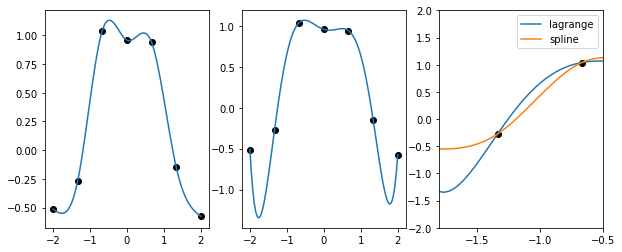

In [84]:
n = 7
x = np.linspace(-2,2,n)
y = np.cos(x**2)+np.random.uniform(-0.2,0.2,n)

sc = CubicSpline(x,y,bc_type='natural')
t = np.linspace(-2,2,100)
psc = sc(t)

plagrange = lagrange(x,y)
q = plagrange(t)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
ax1.scatter(x,y,marker='o',color='k')
ax1.plot(t,psc)

ax2.scatter(x,y,marker='o',color='k')
ax2.plot(t,q)

ax3.set_xlim(-1.8,-0.5)
ax3.set_ylim(-2,2)
ax3.scatter(x,y,marker='o',color='k')
ax3.plot(t,q,label='lagrange')
ax3.plot(t,psc,label='spline')
ax3.legend()